# PreProcesing

In [1]:
import pandas as pd
import numpy as np
import re
import string
import sys
import json
import pickle

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
df = pd.read_excel('dataset/Quran.xlsx')

In [4]:
df.shape

(6236, 5)

In [5]:
df.head(10)

,surat,nama_surat,ayat,arabic,indonesian
0,1,Al-Fātiḥah,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,Dengan menyebut nama Allah Yang Maha Pemurah l...
1,1,Al-Fātiḥah,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,"Segala puji bagi Allah, Tuhan semesta alam."
2,1,Al-Fātiḥah,3,الرَّحْمَٰنِ الرَّحِيمِ,Maha Pemurah lagi Maha Penyayang.
3,1,Al-Fātiḥah,4,مَالِكِ يَوْمِ الدِّينِ,Yang menguasai di Hari Pembalasan.
4,1,Al-Fātiḥah,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,"Hanya Engkaulah yang kami sembah, dan hanya ke..."
5,1,Al-Fātiḥah,6,اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ,"Tunjukilah kami jalan yang lurus,"
6,1,Al-Fātiḥah,7,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ...,(yaitu) Jalan orang-orang yang telah Engkau be...
7,2,Al-Baqarah,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم,Alif laam miim.
8,2,Al-Baqarah,2,ذَٰلِكَ الْكِتَابُ لَا رَيْبَ ۛ فِيهِ ۛ هُدًى ...,Kitab (Al Quran) ini tidak ada keraguan padany...
9,2,Al-Baqarah,3,الَّذِينَ يُؤْمِنُونَ بِالْغَيْبِ وَيُقِيمُونَ...,"(yaitu) mereka yang beriman kepada yang ghaib,..."


In [6]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag"},
    fix_html=True,  # fix HTML tokens

    # corpus from which the word statistics are going to be used
    # for word segmentation
    segmenter="twitter",

    # corpus from which the word statistics are going to be used
    # for spell correction
    corrector="twitter",

    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words

    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,

    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

c:\Users\mmahf\miniconda3\envs\latihanstki\lib\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


c:\Users\mmahf\miniconda3\envs\latihanstki\lib\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [7]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

In [8]:
# fungsi dari AMS 01-03. silakan cek bagaimana saya merubah menjadi fungsi

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space_alzami(text):
    return " ".join(text.split())

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def remove_excessive_dot(text):
    return text.replace('..'," ")


def remove_whitespace_LT(text):
    return text.strip()

def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text)

In [9]:
# hapus untuk <>
def remove_number_eks(text):
    return text.replace('<number>'," ")

def remove_angka(text):
    return re.sub(r"\d+", "", text)

def space_punctuation(text):
    return re.sub('(?<! )(?=[.,!?()])|(?<=[.,!?()])(?! )', r' ', text)

In [10]:
i = 0
final_string = []
s = ""
for text in df['indonesian'].values:
    filteredSentence = []
    EachReviewText = ""
    proc = lower(text)
    proc = change_stripe(proc)
    proc = non_ascii(proc)
    proc = remove_excessive_dot(proc)
    proc = remove_whitespace_LT(proc)
    proc = remove_whitespace_multiple(proc)
    proc = remove_single_char(proc)
    proc = space_punctuation(proc)
    proc = remove_punctuation(proc)
    proc = remove_space_alzami(proc)
    proc = bersih_data(proc)
    proc = remove_number_eks(proc)
    proc = remove_angka(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

In [11]:
df["step01"] = final_string

In [12]:
df

,surat,nama_surat,ayat,arabic,indonesian,step01
0,1,Al-Fātiḥah,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,Dengan menyebut nama Allah Yang Maha Pemurah l...,dengan menyebut nama allah yang maha pemurah l...
1,1,Al-Fātiḥah,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,"Segala puji bagi Allah, Tuhan semesta alam.",segala puji bagi allah tuhan semesta alam
2,1,Al-Fātiḥah,3,الرَّحْمَٰنِ الرَّحِيمِ,Maha Pemurah lagi Maha Penyayang.,maha pemurah lagi maha penyayang
3,1,Al-Fātiḥah,4,مَالِكِ يَوْمِ الدِّينِ,Yang menguasai di Hari Pembalasan.,yang menguasai di hari pembalasan
4,1,Al-Fātiḥah,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,"Hanya Engkaulah yang kami sembah, dan hanya ke...",hanya engkaulah yang kami sembah dan hanya kep...
...,...,...,...,...,...,...
6231,114,An-Nās,2,مَلِكِ النَّاسِ,Raja manusia.,raja manusia
6232,114,An-Nās,3,إِلَٰهِ النَّاسِ,Sembahan manusia.,sembahan manusia
6233,114,An-Nās,4,مِنْ شَرِّ الْوَسْوَاسِ الْخَنَّاسِ,Dari kejahatan (bisikan) syaitan yang biasa be...,dari kejahatan bisikan syaitan yang biasa bers...
6234,114,An-Nās,5,الَّذِي يُوَسْوِسُ فِي صُدُورِ النَّاسِ,yang membisikkan (kejahatan) ke dalam dada man...,yang membisikkan kejahatan ke dalam dada manusia


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   surat       6236 non-null   int64 
 1   nama_surat  6236 non-null   object
 2   ayat        6236 non-null   int64 
 3   arabic      6236 non-null   object
 4   indonesian  6236 non-null   object
 5   step01      6236 non-null   object
dtypes: int64(2), object(4)
memory usage: 292.4+ KB


In [14]:
# token
import nltk
from nltk.tokenize import word_tokenize

In [15]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [16]:
df['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [17]:
df.head(10)

,surat,nama_surat,ayat,arabic,indonesian,step01,tokens
0,1,Al-Fātiḥah,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,Dengan menyebut nama Allah Yang Maha Pemurah l...,dengan menyebut nama allah yang maha pemurah l...,"[dengan, menyebut, nama, allah, yang, maha, pe..."
1,1,Al-Fātiḥah,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,"Segala puji bagi Allah, Tuhan semesta alam.",segala puji bagi allah tuhan semesta alam,"[segala, puji, bagi, allah, tuhan, semesta, alam]"
2,1,Al-Fātiḥah,3,الرَّحْمَٰنِ الرَّحِيمِ,Maha Pemurah lagi Maha Penyayang.,maha pemurah lagi maha penyayang,"[maha, pemurah, lagi, maha, penyayang]"
3,1,Al-Fātiḥah,4,مَالِكِ يَوْمِ الدِّينِ,Yang menguasai di Hari Pembalasan.,yang menguasai di hari pembalasan,"[yang, menguasai, di, hari, pembalasan]"
4,1,Al-Fātiḥah,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,"Hanya Engkaulah yang kami sembah, dan hanya ke...",hanya engkaulah yang kami sembah dan hanya kep...,"[hanya, engkaulah, yang, kami, sembah, dan, ha..."
5,1,Al-Fātiḥah,6,اهْدِنَا الصِّرَاطَ الْمُسْتَقِيمَ,"Tunjukilah kami jalan yang lurus,",tunjukilah kami jalan yang lurus,"[tunjukilah, kami, jalan, yang, lurus]"
6,1,Al-Fātiḥah,7,صِرَاطَ الَّذِينَ أَنْعَمْتَ عَلَيْهِمْ غَيْرِ...,(yaitu) Jalan orang-orang yang telah Engkau be...,yaitu jalan orang orang yang telah engkau beri...,"[yaitu, jalan, orang, orang, yang, telah, engk..."
7,2,Al-Baqarah,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ الم,Alif laam miim.,alif laam miim,"[alif, laam, miim]"
8,2,Al-Baqarah,2,ذَٰلِكَ الْكِتَابُ لَا رَيْبَ ۛ فِيهِ ۛ هُدًى ...,Kitab (Al Quran) ini tidak ada keraguan padany...,kitab al quran ini tidak ada keraguan padanya ...,"[kitab, al, quran, ini, tidak, ada, keraguan, ..."
9,2,Al-Baqarah,3,الَّذِينَ يُؤْمِنُونَ بِالْغَيْبِ وَيُقِيمُونَ...,"(yaitu) mereka yang beriman kepada yang ghaib,...",yaitu mereka yang beriman kepada yang ghaib ya...,"[yaitu, mereka, yang, beriman, kepada, yang, g..."


In [18]:
normalized_word = pd.read_csv('dataset/kamus_clean.csv')

In [19]:
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

C:\Users\mmahf\AppData\Local\Temp\ipykernel_32120\3391283394.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalized_word_dict:
C:\Users\mmahf\AppData\Local\Temp\ipykernel_32120\3391283394.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row[1]


In [20]:
df['final_tokens'] = df['tokens'].apply(normalized_term)

In [21]:
i=0
final_string_tokens = []
for text in df['final_tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [22]:
df["step02"] = final_string_tokens

In [23]:
df.head()

,surat,nama_surat,ayat,arabic,indonesian,step01,tokens,final_tokens,step02
0,1,Al-Fātiḥah,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,Dengan menyebut nama Allah Yang Maha Pemurah l...,dengan menyebut nama allah yang maha pemurah l...,"[dengan, menyebut, nama, allah, yang, maha, pe...","[dengan, menyebut, nama, allah, yang, maha, pe...",dengan menyebut nama allah yang maha pemurah l...
1,1,Al-Fātiḥah,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,"Segala puji bagi Allah, Tuhan semesta alam.",segala puji bagi allah tuhan semesta alam,"[segala, puji, bagi, allah, tuhan, semesta, alam]","[segala, puji, bagi, allah, tuhan, semesta, alam]",segala puji bagi allah tuhan semesta alam
2,1,Al-Fātiḥah,3,الرَّحْمَٰنِ الرَّحِيمِ,Maha Pemurah lagi Maha Penyayang.,maha pemurah lagi maha penyayang,"[maha, pemurah, lagi, maha, penyayang]","[maha, pemurah, lagi, maha, penyayang]",maha pemurah lagi maha penyayang
3,1,Al-Fātiḥah,4,مَالِكِ يَوْمِ الدِّينِ,Yang menguasai di Hari Pembalasan.,yang menguasai di hari pembalasan,"[yang, menguasai, di, hari, pembalasan]","[yang, menguasai, di, hari, pembalasan]",yang menguasai di hari pembalasan
4,1,Al-Fātiḥah,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,"Hanya Engkaulah yang kami sembah, dan hanya ke...",hanya engkaulah yang kami sembah dan hanya kep...,"[hanya, engkaulah, yang, kami, sembah, dan, ha...","[hanya, engkaulah, yang, kami, sembah, dan, ha...",hanya engkaulah yang kami sembah dan hanya kep...


In [24]:
df.to_excel('dataset/clean_dataset_quran.xlsx')

# Steamming

In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [26]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

factory = StopWordRemoverFactory()

data = factory.get_stop_words()

stopwords_sastrawi = factory.create_stop_word_remover()

dictionary = ArrayDictionary(data)
str_stopwords = StopWordRemover(dictionary)

In [27]:
df['finalText_str'] = df['step02'].apply(str)

In [28]:
i=0
final_string = []
s = ""
for sentence in df["finalText_str"].values:
    filteredSentence = []
    EachReviewText = ""
    st = str_stopwords.remove(sentence)
    s = (stemmer.stem(st))
    filteredSentence.append(s)

    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [29]:
df.loc[:, ('ProcessedText')] = final_string

In [30]:
df.head()

,surat,nama_surat,ayat,arabic,indonesian,step01,tokens,final_tokens,step02,finalText_str,ProcessedText
0,1,Al-Fātiḥah,1,بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ,Dengan menyebut nama Allah Yang Maha Pemurah l...,dengan menyebut nama allah yang maha pemurah l...,"[dengan, menyebut, nama, allah, yang, maha, pe...","[dengan, menyebut, nama, allah, yang, maha, pe...",dengan menyebut nama allah yang maha pemurah l...,dengan menyebut nama allah yang maha pemurah l...,sebut nama allah maha murah maha sayang
1,1,Al-Fātiḥah,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,"Segala puji bagi Allah, Tuhan semesta alam.",segala puji bagi allah tuhan semesta alam,"[segala, puji, bagi, allah, tuhan, semesta, alam]","[segala, puji, bagi, allah, tuhan, semesta, alam]",segala puji bagi allah tuhan semesta alam,segala puji bagi allah tuhan semesta alam,segala puji allah tuhan semesta alam
2,1,Al-Fātiḥah,3,الرَّحْمَٰنِ الرَّحِيمِ,Maha Pemurah lagi Maha Penyayang.,maha pemurah lagi maha penyayang,"[maha, pemurah, lagi, maha, penyayang]","[maha, pemurah, lagi, maha, penyayang]",maha pemurah lagi maha penyayang,maha pemurah lagi maha penyayang,maha murah maha sayang
3,1,Al-Fātiḥah,4,مَالِكِ يَوْمِ الدِّينِ,Yang menguasai di Hari Pembalasan.,yang menguasai di hari pembalasan,"[yang, menguasai, di, hari, pembalasan]","[yang, menguasai, di, hari, pembalasan]",yang menguasai di hari pembalasan,yang menguasai di hari pembalasan,kuasa hari balas
4,1,Al-Fātiḥah,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,"Hanya Engkaulah yang kami sembah, dan hanya ke...",hanya engkaulah yang kami sembah dan hanya kep...,"[hanya, engkaulah, yang, kami, sembah, dan, ha...","[hanya, engkaulah, yang, kami, sembah, dan, ha...",hanya engkaulah yang kami sembah dan hanya kep...,hanya engkaulah yang kami sembah dan hanya kep...,engkau sembah hanya engkau kami minta tolong


In [31]:
df.to_excel('dataset/clean_dataset_quran_stem.xlsx')

# TF-IDF

In [32]:
dataset_feature = df['ProcessedText'].astype(str)
dataset_feature

0            sebut nama allah maha murah maha sayang
1               segala puji allah tuhan semesta alam
2                             maha murah maha sayang
3                                   kuasa hari balas
4       engkau sembah hanya engkau kami minta tolong
                            ...                     
6231                                    raja manusia
6232                                  sembah manusia
6233              jahat bisik syaitan biasa sembunyi
6234                  bisik jahat dalam dada manusia
6235                              golong jin manusia
Name: ProcessedText, Length: 6236, dtype: object

In [33]:
dataset_label = df['ayat']
dataset_label

0       1
1       2
2       3
3       4
4       5
       ..
6231    2
6232    3
6233    4
6234    5
6235    6
Name: ayat, Length: 6236, dtype: int64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\mmahf\AppData\Local\Temp\ipykernel_32120\48192011.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


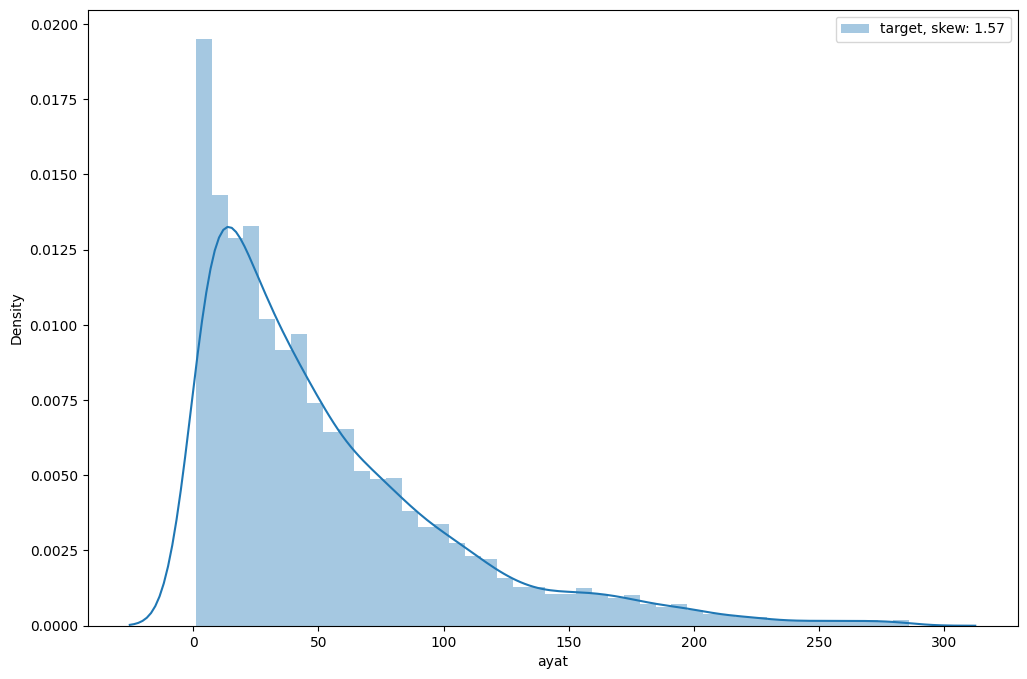

In [35]:
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [36]:
dataset_label.value_counts()

ayat
1      114
3      114
2      114
4      111
5      109
      ... 
250      1
251      1
253      1
254      1
286      1
Name: count, Length: 286, dtype: int64

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
vectorizer = TfidfVectorizer()

In [39]:
corpus_vectorized = vectorizer.fit_transform(dataset_feature)

In [40]:
print(corpus_vectorized.shape)

(6236, 2766)


In [41]:
import joblib

joblib.dump(corpus_vectorized, 'corpus_vectorized.sav')

['corpus_vectorized.sav']

In [42]:
features = vectorizer.get_feature_names_out()
features

array(['aad', 'aalamin', 'aazar', ..., 'zuhur', 'zulaikha', 'zulkifli'],
      dtype=object)

In [43]:
idfValues = vectorizer.idf_

In [44]:
d = dict(zip(features, 9 - idfValues))

sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [45]:
for i in range(2764):
    print(sortedDict[i])

('orang', 7.125012147483451)
('allah', 6.928903678793025)
('kamu', 6.9274988553355765)
('sungguh', 6.846518501086076)
('mereka', 6.646355806650852)
('kata', 6.40378199818068)
('tuhan', 6.200029907490837)
('kepada', 6.180440642494348)
('tidak', 6.16146853075875)
('nya', 5.957544340532369)
('apa', 5.956307481994973)
('kami', 5.938828884721013)
('telah', 5.935043391241532)
('jadi', 5.904232224841134)
('beri', 5.901621257300413)
('ada', 5.888463172722902)
('benar', 5.862975542202754)
('tahu', 5.827010393509239)
('maha', 5.7402550656824465)
('iman', 5.662002868782698)
('yang', 5.651986090539227)
('itu', 5.591466328996574)
('dan', 5.564364399218782)
('dia', 5.544012170369884)
('hari', 5.532733855332177)
('aku', 5.527046636211587)
('akan', 5.5213268875388)
('dapat', 5.519413011356516)
('buat', 5.488282092761343)
('baik', 5.4803455431656065)
('datang', 5.476353521896069)
('diri', 5.4622545975165675)
('bagi', 5.435531527375813)
('adalah', 5.425060227508519)
('kafir', 5.346244836549049)
('dalam'

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [47]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="black", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

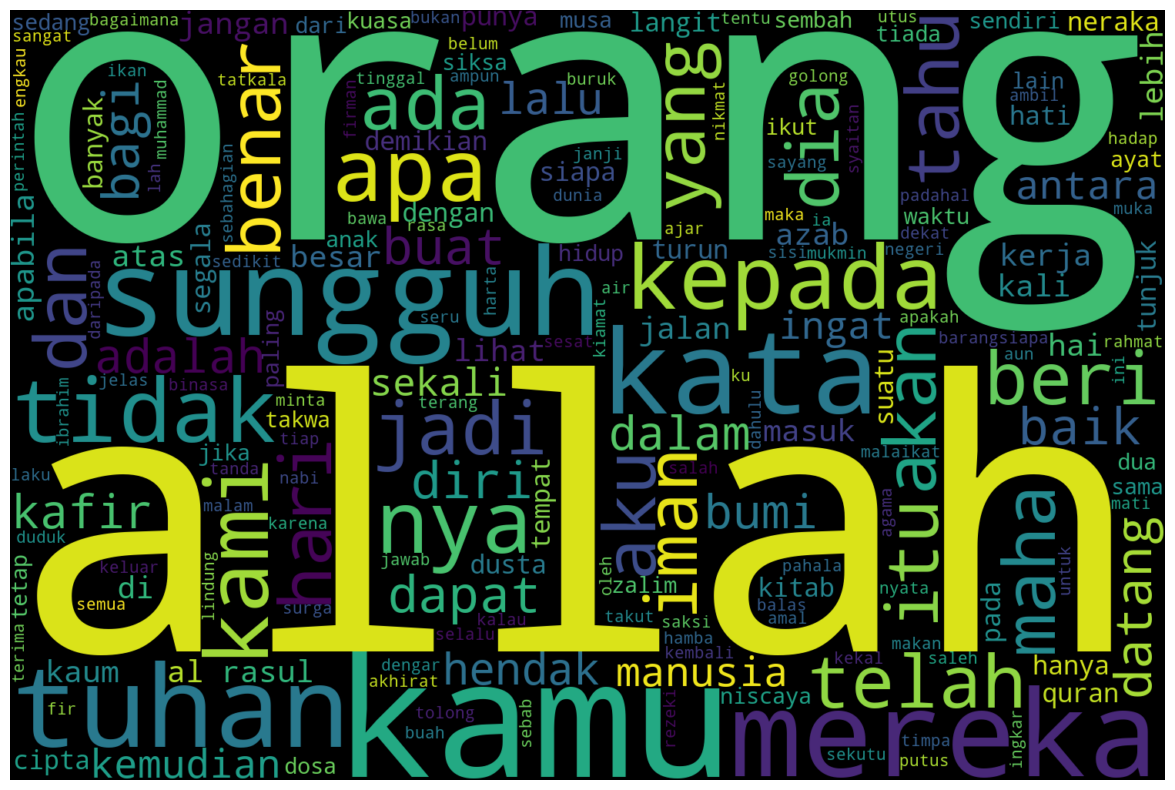

In [48]:
PlotWordCloud(d)

## TF-IDF Similarity

In [49]:
# Mengimpor modul yang diperlukan
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [50]:
# Membuat objek stemmer bahasa Indonesia
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi untuk membersihkan teks
def clean_text(text):
  # Menghapus angka, tanda baca, dan spasi berlebih
  text = re.sub(r'\d+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = re.sub(r'\s+', ' ', text)
  # Mengubah semua huruf menjadi huruf kecil
  text = text.lower()
  # Mengembalikan teks yang sudah dibersihkan
  return text

# Membuat fungsi untuk melakukan stemming
def stem_text(text):
  # Memecah teks menjadi kata-kata
  words = nltk.word_tokenize(text)
  # Melakukan stemming untuk setiap kata
  stemmed_words = [stemmer.stem(word) for word in words]
  # Menggabungkan kata-kata yang sudah distem menjadi teks
  stemmed_text = ' '.join(stemmed_words)
  # Mengembalikan teks yang sudah distem
  return stemmed_text

In [51]:
def show_best_results(dataset, scores_array, top_n=20):
    sorted_indices = scores_array.argsort()[::-1]
    for position, idx in enumerate(sorted_indices[:top_n]):
        row = dataset.iloc[idx]
        arabic = row["arabic"]
        indonesian = row["indonesian"]
        ayat = row["ayat"]
        nama_surat = row["nama_surat"]
        score = scores_array[idx]
        if score > 0:
            print(arabic)
            print(indonesian)
            print(f'Q.S {nama_surat}  ayat {ayat}')
            print(score)
            print("====================================")
        else:
            print(query," not found")
            sys.exit()

In [52]:
def run_tfidf(query):
    clean_input = clean_text(query)
    steam_input = stem_text(clean_input)
    query_vectorized = vectorizer.transform([steam_input])
    scores = query_vectorized.dot(corpus_vectorized.transpose())
    scores_array = scores.toarray()[0]
    print(scores_array)
    show_best_results(df, scores_array)

In [53]:
query = input('Enter your query:')
print ("Query : ", query)
run_tfidf(query)

Query :  Allah maha beasr
[0.52015476 0.09768018 0.55727644 ... 0.         0.         0.        ]
فَضْلًا مِنَ اللَّهِ وَنِعْمَةً ۚ وَاللَّهُ عَلِيمٌ حَكِيمٌ
sebagai karunia dan nikmat dari Allah. Dan Allah Maha Mengetahui lagi Maha Bijaksana.
Q.S Al-Ḥujurāt  ayat 8
0.6371028498663791
هُوَ اللَّهُ الَّذِي لَا إِلَٰهَ إِلَّا هُوَ الْمَلِكُ الْقُدُّوسُ السَّلَامُ الْمُؤْمِنُ الْمُهَيْمِنُ الْعَزِيزُ الْجَبَّارُ الْمُتَكَبِّرُ ۚ سُبْحَانَ اللَّهِ عَمَّا يُشْرِكُونَ
Dialah Allah Yang tiada Tuhan selain Dia, Raja, Yang Maha Suci, Yang Maha Sejahtera, Yang Mengaruniakan Keamanan, Yang Maha Memelihara, Yang Maha Perkasa, Yang Maha Kuasa, Yang Memiliki segala Keagungan, Maha Suci Allah dari apa yang mereka persekutukan.
Q.S Al-Ḥasyr  ayat 23
0.6098237061507993
وَاسْتَغْفِرِ اللَّهَ ۖ إِنَّ اللَّهَ كَانَ غَفُورًا رَحِيمًا
dan mohonlah ampun kepada Allah. Sesungguhnya Allah Maha Pengampun lagi Maha Penyayang.
Q.S An-Nisā'  ayat 106
0.5941551595210037
بِسْمِ اللَّهِ الرَّحْمَٰنِ الرَّحِيمِ يَا أَ